In [8]:
from functions import *
import numpy as np
import matplotlib.pyplot as plt

In [2]:
generate_ex1(3000, 6500, "Test-Data")

In [11]:
!time ../build/src/laplace_serial --config ../examples/config.txt --result-path ../examples/Test-Data/N3000_M6500_res_serial

OpenMP NOT enabled.
Results saved to file: ../examples/Test-Data/N3000_M6500_res_serial, using 242 iterations.
bye

real	0m20,455s
user	1m39,447s
sys	0m0,703s


In [12]:
%%bash
for ((i = 1; i <= 4; i++));
do
export OMP_NUM_THREADS=${i}
time ../build/src/laplace --config ../examples/config.txt --result-path ../examples/Test-Data/N3000_M6500_res_openMP_${i}
done

OpenMP enabled. Threads: 1
Results saved to file: ../examples/Test-Data/N3000_M6500_res_openMP_1, using 242 iterations.
bye



real	0m47,835s
user	0m47,327s
sys	0m0,490s


OpenMP enabled. Threads: 2
Results saved to file: ../examples/Test-Data/N3000_M6500_res_openMP_2, using 242 iterations.
bye



real	0m30,106s
user	0m47,938s
sys	0m0,483s


OpenMP enabled. Threads: 3
Results saved to file: ../examples/Test-Data/N3000_M6500_res_openMP_3, using 242 iterations.
bye



real	0m24,210s
user	0m48,744s
sys	0m0,498s


OpenMP enabled. Threads: 4
Results saved to file: ../examples/Test-Data/N3000_M6500_res_openMP_4, using 242 iterations.
bye



real	0m21,525s
user	0m49,506s
sys	0m0,504s


In [4]:
!time python jacobi.py --config ../examples/config.txt --result-path ../examples/Test-Data/N3000_M6500_res_python.csv

Results saved to file: ../examples/Test-Data/N3000_M6500_res_python.csv.
bye
Figure(640x480)

real	0m0,568s
user	0m1,562s
sys	0m0,064s


In [16]:
file_list = ["Test-Data/N3000_M6500_res_python.csv", 
             "Test-Data/N3000_M6500_res_serial.csv", "Test-Data/N3000_M6500_res_serial.h5",
             "Test-Data/N3000_M6500_res_openMP_1.csv", "Test-Data/N3000_M6500_res_openMP_1.h5",
             "Test-Data/N3000_M6500_res_openMP_2.csv", "Test-Data/N3000_M6500_res_openMP_2.h5",
             "Test-Data/N3000_M6500_res_openMP_3.csv", "Test-Data/N3000_M6500_res_openMP_3.h5",
             "Test-Data/N3000_M6500_res_openMP_4.csv", "Test-Data/N3000_M6500_res_openMP_4.h5",
             ]
reference_file = "Test-Data/N3000_M6500_res_python.csv"
compare_arrays(file_list, reference_file, rtol=1e-5, atol=1e-8)

[PASS] Test-Data/N3000_M6500_res_serial.csv is close to Test-Data/N3000_M6500_res_python.csv
[PASS] Test-Data/N3000_M6500_res_serial.h5 is close to Test-Data/N3000_M6500_res_python.csv
[PASS] Test-Data/N3000_M6500_res_openMP_1.csv is close to Test-Data/N3000_M6500_res_python.csv
[PASS] Test-Data/N3000_M6500_res_openMP_1.h5 is close to Test-Data/N3000_M6500_res_python.csv
[PASS] Test-Data/N3000_M6500_res_openMP_2.csv is close to Test-Data/N3000_M6500_res_python.csv
[PASS] Test-Data/N3000_M6500_res_openMP_2.h5 is close to Test-Data/N3000_M6500_res_python.csv
[PASS] Test-Data/N3000_M6500_res_openMP_3.csv is close to Test-Data/N3000_M6500_res_python.csv
[PASS] Test-Data/N3000_M6500_res_openMP_3.h5 is close to Test-Data/N3000_M6500_res_python.csv
[PASS] Test-Data/N3000_M6500_res_openMP_4.csv is close to Test-Data/N3000_M6500_res_python.csv
[PASS] Test-Data/N3000_M6500_res_openMP_4.h5 is close to Test-Data/N3000_M6500_res_python.csv


True

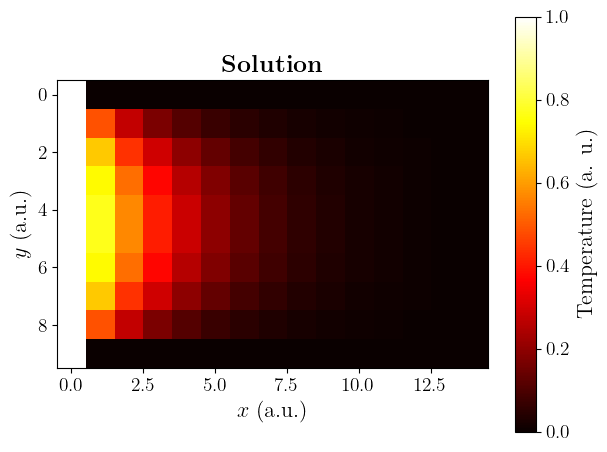

In [23]:
data = np.loadtxt("Data/N10_M15_res_serial.csv", delimiter=" ")
# Ploting the heatmap

plt.rcParams.update({
    "text.usetex": True,
    "font.size": 16,
    "font.family": "serif",
})

fig, ax = plt.subplots()

# Show the heatmap
cax = ax.imshow(data, cmap='hot')

# Add colorbar with label
cbar = fig.colorbar(cax, ax=ax)
cbar.set_label(r"Temperature (a. u.)", fontsize=16)

# Axis labels and title
ax.set_xlabel(r"$x$ (a.u.)", fontsize=16)
ax.set_ylabel(r"$y$ (a.u.)", fontsize=16)
ax.set_title(r"\textbf{Solution}", fontsize=18)

# Tick label size
ax.tick_params(labelsize=14)
cbar.ax.tick_params(labelsize=14)

plt.tight_layout()
plt.savefig("solution.png", dpi=300)
plt.show()